In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import ConfusionMatrixDisplay,accuracy_score,classification_report
from scipy import stats

In [4]:

data = pd.read_csv("Admission_Predict.csv")

In [5]:
data

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65
...,...,...,...,...,...,...,...,...,...
395,396,324,110,3,3.5,3.5,9.04,1,0.82
396,397,325,107,3,3.0,3.5,9.11,1,0.84
397,398,330,116,4,5.0,4.5,9.45,1,0.91
398,399,312,103,3,3.5,4.0,8.78,0,0.67


In [51]:
data.isnull().count()

Serial No.           400
GRE Score            400
TOEFL Score          400
University Rating    400
SOP                  400
LOR                  400
CGPA                 400
Research             400
Chance of Admit      400
dtype: int64

In [52]:
data.describe()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
count,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000
mean,200.500000,316.807500,107.410000,3.087500,3.400000,3.452500,8.598925,0.547500,0.724350
std,115.614301,11.473646,6.069514,1.143728,1.006869,0.898478,0.596317,0.498362,0.142609
min,1.000000,290.000000,92.000000,1.000000,1.000000,1.000000,6.800000,0.000000,0.340000
25%,100.750000,308.000000,103.000000,2.000000,2.500000,3.000000,8.170000,0.000000,0.640000
50%,200.500000,317.000000,107.000000,3.000000,3.500000,3.500000,8.610000,1.000000,0.730000
75%,300.250000,325.000000,112.000000,4.000000,4.000000,4.000000,9.062500,1.000000,0.830000
max,400.000000,340.000000,120.000000,5.000000,5.000000,5.000000,9.920000,1.000000,0.970000


In [69]:
data.dtypes

Outliers:     GRE Score  TOEFL Score  University Rating  SOP  LOR   CGPA  Research  \
58        300           99                  1  3.0   2.0   6.8         1   

    Chance of Admit   
58                 0  


In [54]:

#Outliers 
z_scores = np.abs(stats.zscore(data))
threshold = 3 
outliers = (z_scores > threshold).any(axis=1)
print("Outliers:", data[outliers])

Serial No.             int64
GRE Score              int64
TOEFL Score            int64
University Rating      int64
SOP                  float64
LOR                  float64
CGPA                 float64
Research               int64
Chance of Admit      float64
dtype: object

In [55]:
def func(x):
    if x>=0.75: return 1
    else: return 0
data['Chance of Admit '] = data['Chance of Admit '].apply(func)
data

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,1
1,2,324,107,4,4.0,4.5,8.87,1,1
2,3,316,104,3,3.0,3.5,8.00,1,0
3,4,322,110,3,3.5,2.5,8.67,1,1
4,5,314,103,2,2.0,3.0,8.21,0,0
...,...,...,...,...,...,...,...,...,...
395,396,324,110,3,3.5,3.5,9.04,1,1
396,397,325,107,3,3.0,3.5,9.11,1,1
397,398,330,116,4,5.0,4.5,9.45,1,1
398,399,312,103,3,3.5,4.0,8.78,0,0


In [56]:
data=data.drop('Serial No.',axis=1)
data

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,337,118,4,4.5,4.5,9.65,1,1
1,324,107,4,4.0,4.5,8.87,1,1
2,316,104,3,3.0,3.5,8.00,1,0
3,322,110,3,3.5,2.5,8.67,1,1
4,314,103,2,2.0,3.0,8.21,0,0
...,...,...,...,...,...,...,...,...
395,324,110,3,3.5,3.5,9.04,1,1
396,325,107,3,3.0,3.5,9.11,1,1
397,330,116,4,5.0,4.5,9.45,1,1
398,312,103,3,3.5,4.0,8.78,0,0


In [57]:
x = data[['GRE Score', 'TOEFL Score', 'University Rating', 'SOP', 'LOR ', 'CGPA',
       'Research']]

y = data[['Chance of Admit ']]

In [58]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.25,random_state=1)
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(300, 7)
(300, 1)
(100, 7)
(100, 1)


In [59]:
# Decision Tree on Gini Index criterion
model_gini = DecisionTreeClassifier(random_state=1,criterion='gini',splitter='best',max_leaf_nodes=None)
model_gini.fit(x_train,y_train)

# Decision Tree on Entropy criterion
model_entropy = DecisionTreeClassifier(random_state=1,criterion='entropy',splitter='best',max_leaf_nodes=None)
model_entropy.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy', random_state=1)

In [60]:
y_test_pred1 = model_gini.predict(x_test)
y_train_pred1 = model_gini.predict(x_train)

y_test_pred2 = model_entropy.predict(x_test)
y_train_pred2 = model_entropy.predict(x_train)

Accuracy Score :  0.78


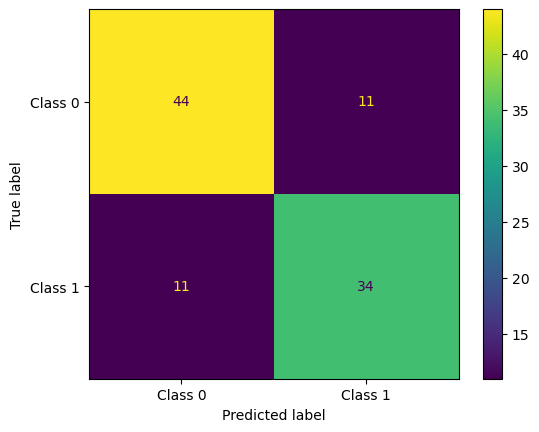

In [61]:
# Confusion Matrix Testing by Model based on GINI
ConfusionMatrixDisplay.from_predictions(y_test,y_test_pred1,display_labels=['Class 0', 'Class 1'])
plt.show
print("Accuracy Score : ",accuracy_score(y_test,y_test_pred1))



Accuracy Score :  0.79


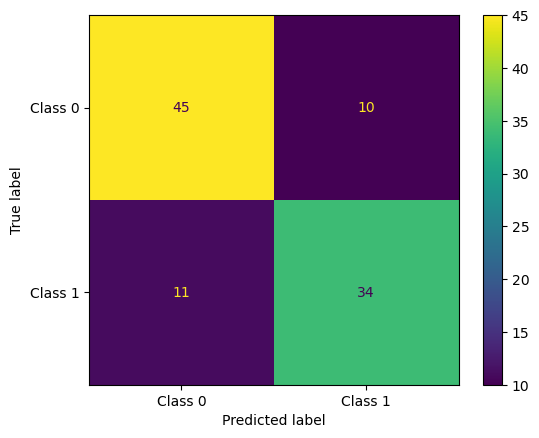

In [62]:
# Confusion Matrix Testing by Model based on ENTROPY
ConfusionMatrixDisplay.from_predictions(y_test,y_test_pred2,display_labels=['Class 0', 'Class 1'])
plt.show
print("Accuracy Score : ",accuracy_score(y_test,y_test_pred2))

Accuracy Score :  1.0


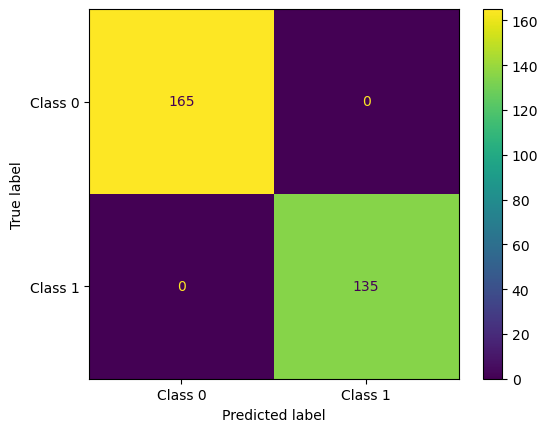

In [63]:
# Confusion Matrix Training by Model based on GINI
ConfusionMatrixDisplay.from_predictions(y_train,y_train_pred1,display_labels=['Class 0', 'Class 1'])
plt.show
print("Accuracy Score : ",accuracy_score(y_train,y_train_pred1))

Accuracy Score :  1.0


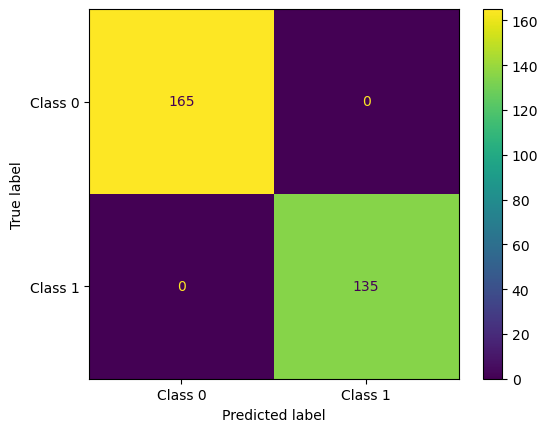

In [64]:
# Confusion Matrix Training by Model based on ENTROPY
ConfusionMatrixDisplay.from_predictions(y_train,y_train_pred2,display_labels=['Class 0', 'Class 1'])
plt.show
print("Accuracy Score : ",accuracy_score(y_train,y_train_pred2))

In [65]:
print("Confusion Matrix Testing by Model based on GINI")
print(classification_report(y_test,y_test_pred1));print()
print("Confusion Matrix Testing by Model based on ENTROPY")
print(classification_report(y_test,y_test_pred2));print()
print("Confusion Matrix Training by Model based on GINI")
print(classification_report(y_train,y_train_pred1));print()
print("Confusion Matrix Traniing by Model based on ENTROPY")
print(classification_report(y_train,y_train_pred2));print()

Confusion Matrix Testing by Model based on GINI
              precision    recall  f1-score   support

           0       0.80      0.80      0.80        55
           1       0.76      0.76      0.76        45

    accuracy                           0.78       100
   macro avg       0.78      0.78      0.78       100
weighted avg       0.78      0.78      0.78       100


Confusion Matrix Testing by Model based on ENTROPY
              precision    recall  f1-score   support

           0       0.80      0.82      0.81        55
           1       0.77      0.76      0.76        45

    accuracy                           0.79       100
   macro avg       0.79      0.79      0.79       100
weighted avg       0.79      0.79      0.79       100


Confusion Matrix Training by Model based on GINI
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       165
           1       1.00      1.00      1.00       135

    accuracy                    

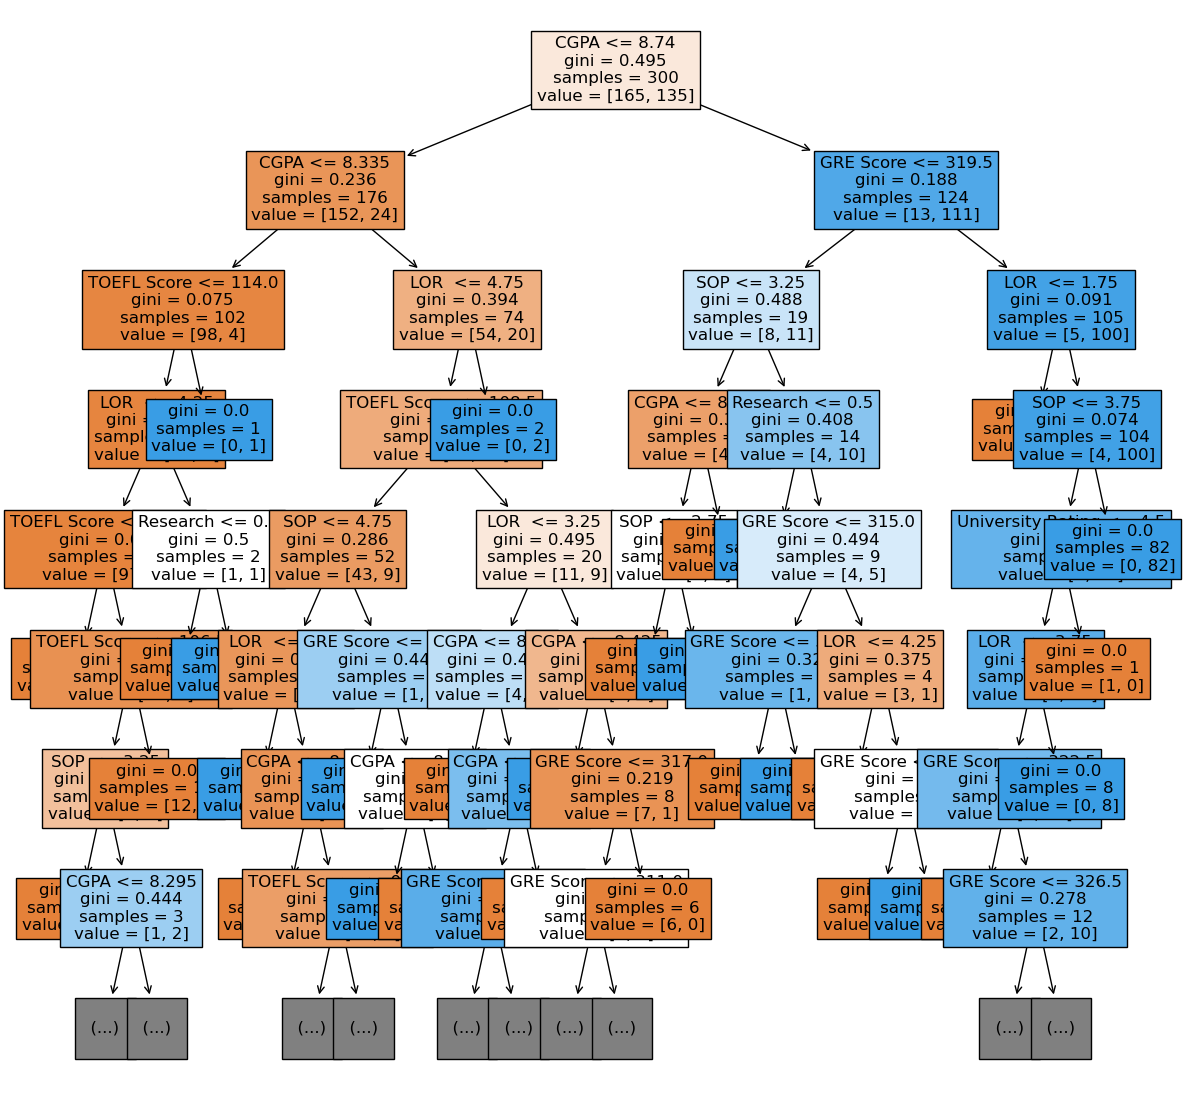

In [66]:
plt.figure(figsize=(14,14))
plot_tree(model_gini,fontsize=12,max_depth=7,filled=True,feature_names=list(x.columns));

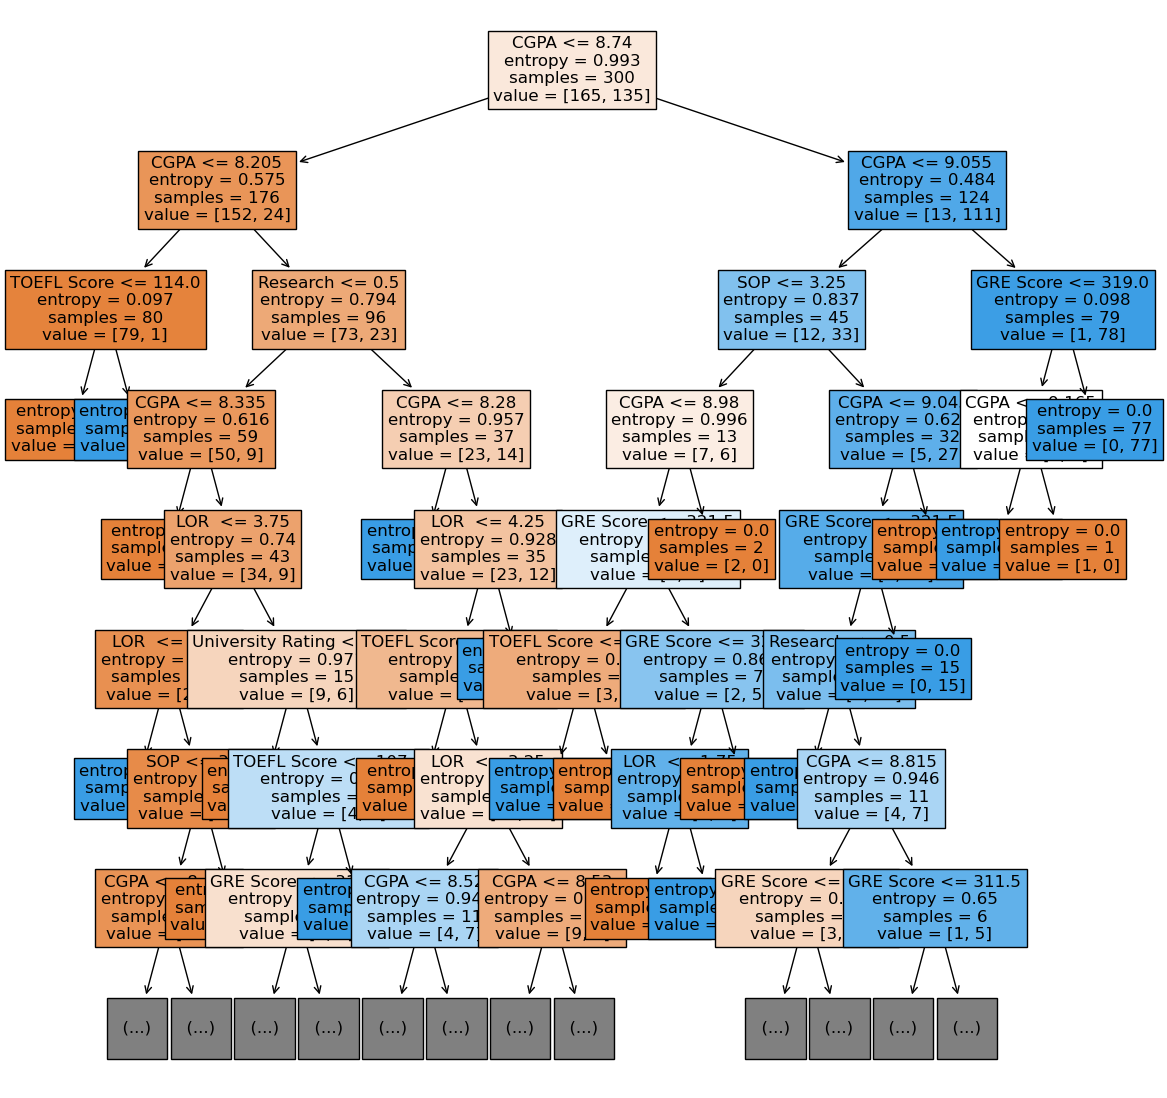

In [67]:
plt.figure(figsize=(14,14))
plot_tree(model_entropy,fontsize=12,max_depth=7,filled=True,feature_names=list(x.columns));

In [8]:
help (plot_tree)



Help on function plot_tree in module sklearn.tree._export:

plot_tree(decision_tree, *, max_depth=None, feature_names=None, class_names=None, label='all', filled=False, impurity=True, node_ids=False, proportion=False, rounded=False, precision=3, ax=None, fontsize=None)
    Plot a decision tree.
    
    The sample counts that are shown are weighted with any sample_weights that
    might be present.
    
    The visualization is fit automatically to the size of the axis.
    Use the ``figsize`` or ``dpi`` arguments of ``plt.figure``  to control
    the size of the rendering.
    
    Read more in the :ref:`User Guide <tree>`.
    
    .. versionadded:: 0.21
    
    Parameters
    ----------
    decision_tree : decision tree regressor or classifier
        The decision tree to be plotted.
    
    max_depth : int, default=None
        The maximum depth of the representation. If None, the tree is fully
        generated.
    
    feature_names : list of str, default=None
        Names of